/home/oc/PycharmProjects/triangulization/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


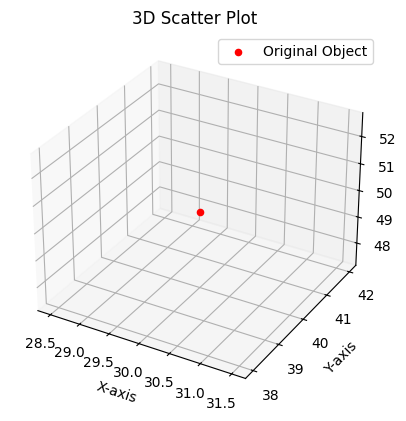

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import random
import numpy as np
from itertools import combinations
from sklearn.cluster import KMeans

def random_anchor_gen(number_of_anchors):
    anchors = {i: (np.random.uniform(0, 10, size=(1, 3))) for i in range(number_of_anchors)}
    return anchors


def euclidean_distance(original_object, anchors):
    original_distances = {k: np.linalg.norm(v[0] - original_object) for k , v in anchors.items()}

    return original_distances


def generate_original_signal(path_loss_coefficient, original_distance):
    original_signal_strength = {k: -40 - (10 * path_loss_coefficient * math.log(v, 10)) for k,v in
                                original_distance.items()}

    return original_signal_strength


def generate_error_signal_strength(original_signal_strength):
    error_signal_strength = {k: v + random.uniform(-1, 0) for k,v in
                             original_signal_strength.items()}

    return error_signal_strength


def generate_error_distances(path_loss_coefficient, error_signal_strength):
    error_distances = {k: 10 ** ((-40 - v) / (10 * path_loss_coefficient)) for k , v in
                       error_signal_strength.items()}
    return error_distances

number_of_clusters = 5
original_object = np.array([30, 40, 50])
number_of_anchors = 5
path_loss_coefficient = 1.7
anchors = random_anchor_gen(number_of_anchors)
original_distances = euclidean_distance(original_object, anchors)
original_signal_strength = generate_original_signal(path_loss_coefficient, original_distances)
error_signal_strength = generate_error_signal_strength(original_signal_strength)
error_distances = generate_error_distances(path_loss_coefficient, error_signal_strength)
all_combinations = list(combinations(anchors, 4))

all_possible_coordinates = []

for com in all_combinations:
    A = np.array([[2*(anchors[com[0]][0][0]-anchors[com[1]][0][0]), 2*(anchors[com[0]][0][1]-anchors[com[1]][0][1]), 2*(anchors[com[0]][0][2]-anchors[com[1]][0][2])],
                [2*(anchors[com[0]][0][0]-anchors[com[2]][0][0]), 2*(anchors[com[0]][0][1]-anchors[com[2]][0][1]), 2*(anchors[com[0]][0][2]-anchors[com[2]][0][2])],
                [2*(anchors[com[0]][0][0]-anchors[com[3]][0][0]), 2*(anchors[com[0]][0][1]-anchors[com[3]][0][1]), 2*(anchors[com[0]][0][2]-anchors[com[3]][0][2])]])


    B = np.array([[(original_distances[com[1]])**2 - (original_distances[com[0]])**2 + (anchors[com[0]][0][0])**2 - (anchors[com[1]][0][0])**2 + (anchors[com[0]][0][1])**2 - (anchors[com[1]][0][1])**2 + (anchors[com[0]][0][2])**2 - (anchors[com[1]][0][2])**2],
           [(original_distances[com[2]])**2 - (original_distances[com[0]])**2 + (anchors[com[0]][0][0])**2 - (anchors[com[2]][0][0])**2 + (anchors[com[0]][0][1])**2 - (anchors[com[2]][0][1])**2 + (anchors[com[0]][0][2])**2 - (anchors[com[2]][0][2])**2],
               [(original_distances[com[3]])**2 - (original_distances[com[0]])**2 + (anchors[com[0]][0][0])**2 - (anchors[com[3]][0][0])**2 + (anchors[com[0]][0][1])**2 - (anchors[com[3]][0][1])**2 + (anchors[com[0]][0][2])**2 - (anchors[com[3]][0][2])**2]
               ])

    X = np.dot(np.linalg.inv(A),B)

    temp_list= []
    for i in X.tolist():
        temp_list.extend(i)
    all_possible_coordinates.append(temp_list)

kmeans = KMeans(n_clusters=5)
kmeans.fit(all_possible_coordinates)

# Sample data for the 3D plot
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [2, 3, 4, 5, 6]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D space
ax.scatter(original_object[0], original_object[1], original_object[2], c='r', marker='o', label='Original Object')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set the title of the 3D plot
ax.set_title('3D Scatter Plot')

# Display the legend
ax.legend()

# Show the 3D plot
plt.show()


In [111]:
import numpy as np
import sympy as sp
import math
import random
from itertools import combinations
from sklearn.cluster import KMeans
# anchors = {
#     'A': np.random.uniform(0, 300,size=(1, 3)),
#     'B': np.random.uniform(0, 300,size=(1, 3)),
#     'C': np.random.uniform(0, 300,size=(1, 3)),
#     'D': np.random.uniform(0, 300,size=(1, 3)),
#     'E': np.random.uniform(0, 300,size=(1, 3))
# }
anchors = {
    'A': np.array([40 ,30, 90]),
    'B': np.array([0, 200, 100]),
    'C': np.array([200, 200, 250]),
    'D': np.array([200,0, 200]),
    'E': np.array([0,0,0])
}
original_object = np.array([30,40,50])

# Original value without error between mobile and wifi router
original_distances = {
    'AT': np.linalg.norm(anchors['A'] -original_object),
    'BT': np.linalg.norm(anchors['B'] -original_object),
    'CT': np.linalg.norm(anchors['C'] -original_object),
    'DT': np.linalg.norm(anchors['D'] -original_object),
    'ET': np.linalg.norm(anchors['E'] -original_object)
}


In [112]:
original_signal_strength = {
    'A': -40 -(10*1.7*math.log(original_distances['AT'],10)),
    'B': -40 -(10*1.7*math.log(original_distances['BT'],10)),
    'C': -40 -(10*1.7*math.log(original_distances['CT'],10)),
    'D': -40 -(10*1.7*math.log(original_distances['DT'],10)),
    'E': -40 -(10*1.7*math.log(original_distances['ET'],10))
}

In [113]:
error_signal_strength = {
    'A': original_signal_strength['A'] + random.uniform(-1,0),
    'B': original_signal_strength['B'] + random.uniform(-1,0),
    'C': original_signal_strength['C'] + random.uniform(-1,0),
    'D': original_signal_strength['D'] + random.uniform(-1,0),
    'E': original_signal_strength['E'] + random.uniform(-1,0)
}

In [114]:
error_distances = {
    'AT': 10**((-40-error_signal_strength['A'])/(10*1.7)),
    'BT': 10**((-40-error_signal_strength['B'])/(10*1.7)),
    'CT': 10**((-40-error_signal_strength['C'])/(10*1.7)),
    'DT': 10**((-40-error_signal_strength['D'])/(10*1.7)),
    'ET': 10**((-40-error_signal_strength['E'])/(10*1.7))
}

In [115]:
error_signal_strength

{'A': -68.6626701198273,
 'B': -78.58610152493446,
 'C': -82.91034533839624,
 'D': -81.0902744939855,
 'E': -72.38587040376643}

In [116]:
original_signal_strength

{'A': -67.6698162933781,
 'B': -77.93038298214113,
 'C': -82.29117037232874,
 'D': -80.15634489160671,
 'E': -71.44124503685616}

In [117]:
original_distances

{'AT': 42.42640687119285,
 'BT': 170.29386365926402,
 'CT': 307.40852297878797,
 'DT': 230.21728866442677,
 'ET': 70.71067811865476}

In [118]:
error_distances

{'AT': 48.533254945537294,
 'BT': 186.11041517048085,
 'CT': 334.30121966971564,
 'DT': 261.2612318575032,
 'ET': 80.36208577680141}

In [119]:
all_combinations = list(combinations(anchors,4))

In [120]:
all_combinations

[('A', 'B', 'C', 'D'),
 ('A', 'B', 'C', 'E'),
 ('A', 'B', 'D', 'E'),
 ('A', 'C', 'D', 'E'),
 ('B', 'C', 'D', 'E')]

In [121]:
all_possible_coordinates = []

for com in all_combinations:
    # X, Y, Z = sp.symbols('X Y Z')
    print(com[3])
    arr_str1= com[0]+'T'
    arr_str2= com[1]+'T'
    arr_str3= com[2]+'T'
    arr_str4= com[3]+'T'
    print(arr_str3)

# Constants from your equations
#     x1, x2, x3, x4 = [anchors[com[0]][0], anchors[com[1]][0], anchors[com[2]][0], anchors[com[3]][0]]  # Replace with your constants
#     y1, y2, y3, y4 = [anchors[com[0]][1], anchors[com[1]][1], anchors[com[2]][1], anchors[com[3]][1]]   # Replace with your constants
#     z1, z2, z3, z4 = [anchors[com[0]][2], anchors[com[1]][2], anchors[com[2]][2], anchors[com[3]][2]]  # Replace with your constants
#     d1, d2, d3, d4 = [error_distances[arr_str1], error_distances[arr_str2], error_distances[arr_str3], error_distances[arr_str4]]  # Replace with your constants
# # 
# #  Define the system of equations
#     equations = [
#         sp.Eq((X - x1)**2 + (Y - y1)**2 + (Z - z1)**2, d1**2),
#         sp.Eq((X - x2)**2 + (Y - y2)**2 + (Z - z2)**2, d2**2),
#         sp.Eq((X - x3)**2 + (Y - y3)**2 + (Z - z3)**2, d3**2),
#         sp.Eq((X - x4)**2 + (Y - y4)**2 + (Z - z4)**2, d4**2)
#     ]
#     solution = sp.solve(equations, (X, Y, Z),domain=sp.S.Reals)
#     print(solution)
#     all_possible_coordinates.append(solution)
    # A = np.array([[((2*(anchors[com[0]][0])) - 2*(anchors[com[2]][0])), ((2*(anchors[com[0]][1])) - 2*(anchors[com[2]][1]))],
    #          [((2*(anchors[com[1]][0])) - 2*(anchors[com[2]][0])), ((2*(anchors[com[1]][1])) - 2*(anchors[com[2]][1]))]])
    # 
    # B = np.array([[(anchors[com[0]][0])**2 - (anchors[com[2]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[2]][1])**2 + (error_distances[arr_str3])**2 - (error_distances[arr_str1])**2],
    #           [(anchors[com[1]][0])**2 - (anchors[com[2]][0])**2 + (anchors[com[1]][1])**2 - (anchors[com[2]][1])**2 + (error_distances[arr_str3])**2 - (error_distances[arr_str2])**2]]) 
    A = np.array([[2*(anchors[com[0]][0]-anchors[com[1]][0]), 2*(anchors[com[0]][1]-anchors[com[1]][1]), 2*(anchors[com[0]][2]-anchors[com[1]][2])],
                [2*(anchors[com[0]][0]-anchors[com[2]][0]), 2*(anchors[com[0]][1]-anchors[com[2]][1]), 2*(anchors[com[0]][2]-anchors[com[2]][2])],
                [2*(anchors[com[0]][0]-anchors[com[3]][0]), 2*(anchors[com[0]][1]-anchors[com[3]][1]), 2*(anchors[com[0]][2]-anchors[com[3]][2])]])


    B = np.array([[(original_distances[arr_str2])**2 - (original_distances[arr_str1])**2 + (anchors[com[0]][0])**2 - (anchors[com[1]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[1]][1])**2 + (anchors[com[0]][2])**2 - (anchors[com[1]][2])**2],
           [(original_distances[arr_str3])**2 - (original_distances[arr_str1])**2 + (anchors[com[0]][0])**2 - (anchors[com[2]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[2]][1])**2 + (anchors[com[0]][2])**2 - (anchors[com[2]][2])**2],
               [(original_distances[arr_str4])**2 - (original_distances[arr_str1])**2 + (anchors[com[0]][0])**2 - (anchors[com[3]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[3]][1])**2 + (anchors[com[0]][2])**2 - (anchors[com[3]][2])**2]
               ])

    X = np.dot(np.linalg.inv(A),B)

    temp_list= []
    for i in X.tolist():
        temp_list.extend(i)
    all_possible_coordinates.append(temp_list)


D
CT
E
CT
E
DT
E
DT
E
DT


In [122]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(all_possible_coordinates)

/home/oc/PycharmProjects/triangulization/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [123]:
kmeans.labels_

array([1, 0, 4, 3, 2], dtype=int32)

In [124]:
kmeans.cluster_centers_

array([[30., 40., 50.],
       [30., 40., 50.],
       [30., 40., 50.],
       [30., 40., 50.],
       [30., 40., 50.]])

In [125]:
all_possible_coordinates

[[29.999999999999165, 39.99999999999979, 50.00000000000081],
 [29.999999999999993, 39.99999999999997, 50.000000000000036],
 [29.999999999999957, 39.999999999999986, 50.00000000000002],
 [29.999999999999957, 39.99999999999997, 50.00000000000002],
 [29.999999999999893, 39.999999999999936, 50.000000000000114]]

In [126]:
com[3]

'E'

In [127]:
# arr_str4 = 0
# A3 = np.array([[2*(anchors[com[0]][0]-anchors[com[1]][0]), 2*(anchors[com[0]][1]-anchors[com[1]][1]), 2*(anchors[com[0]][2]-anchors[com[1]][2])],
#                 [2*(anchors[com[0]][0]-anchors[com[2]][0]), 2*(anchors[com[0]][1]-anchors[com[2]][1]), 2*(anchors[com[0]][2]-anchors[com[2]][2])],
#                 [2*(anchors[com[0]][0]-anchors[com[3]][0]), 2*(anchors[com[0]][1]-anchors[com[3]][1]), 2*(anchors[com[0]][2]-anchors[com[3]][2])]])
# 
# B3 = np.array([[(error_distances[arr_str2])**2 - (error_distances[arr_str1])**2 + (anchors[com[0]][0])**2 - (anchors[com[1]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[1]][1])**2 - (anchors[com[0]][2])**20, (anchors[com[1]][2])**2],
#            [(error_distances[arr_str3])**2 - (error_distances[arr_str1])**2 + (anchors[com[0]][0])**2 - (anchors[com[2]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[2]][1])**2 - (anchors[com[0]][2])**20, (anchors[com[2]][2])**2],
#                [(error_distances[arr_str4])**2 - (error_distances[arr_str1])**2 + (anchors[com[0]][0])**2 - (anchors[com[3]][0])**2 + (anchors[com[0]][1])**2 - (anchors[com[3]][1])**2 - (anchors[com[0]][2])**20, (anchors[com[3]][2])**2]
#                ])